# Customer Segmentation Clustering using K-Means Algorithm

Citation:

Segmentation dataset is provided by: https://www.kaggle.com/

## Problem Definition

A retail company wants to better understand its customer base by segmenting customers into distinct groups based on their purchasing behavior. Currently, the company lacks insight into how different types of customers interact with their products, making it difficult to create targeted marketing strategies, improve customer satisfaction, and boost sales.

**Goals**: 

 
 

* Identify customer segments based on similarities in purchasing patterns, demographics, or behaviors.
* Understand key characteristics of each segment to enable personalized marketing and product recommendations.
* Improve business decision-making by focusing on high-value customer groups and optimizing marketing campaigns.
* Increase customer retention and satisfaction by tailoring experiences and offers to each segment's preferences.

#### Import Required Libraries

In [912]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset Creation

In [913]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


#### Initial Data Preprocessing

* Looking at the Data Structure: info(), describe(), value_counts()
* Handling missing values
* Removing duplicates
* Converting categorical data into numerical form 
* Basic feature selection (removing irrelevant columns)

Make a copy of the data

In [914]:
df_copy = df.copy()

In [915]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [916]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [917]:
print(df_copy.duplicated().any())

False


Remove the ID column

In [918]:
df_copy.drop('ID', axis=1, inplace=True)

In [919]:
df_copy.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0


#### Exploratory Data Analysis (EDA)

* Visualize the data using histograms, scatter plots, box-plots etc.
* Identify `patterns, relationships, or outliers` in the data.
* Understand the `distribution of features, correlations, redundancy and multicollinearity` etc.
* Check for class imbalace.
* Feature engineering might be done based on insights from EDA (e.g., creating new features or transforming existing ones).

Let's check for highly correlated and redundant features.

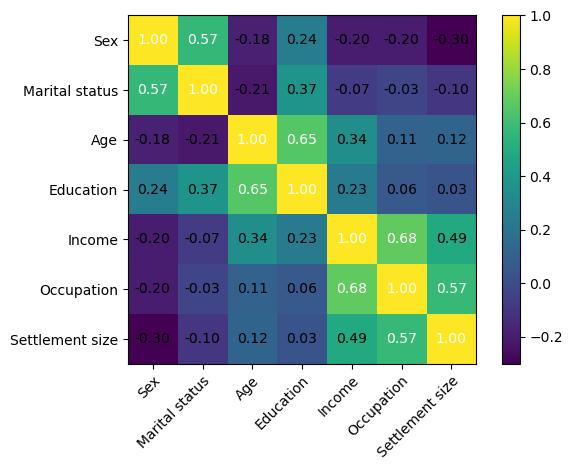

In [920]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df_copy.values.T)
hm = heatmap(cm, row_names=df_copy.columns, column_names=df_copy.columns)
plt.tight_layout()
plt.show()

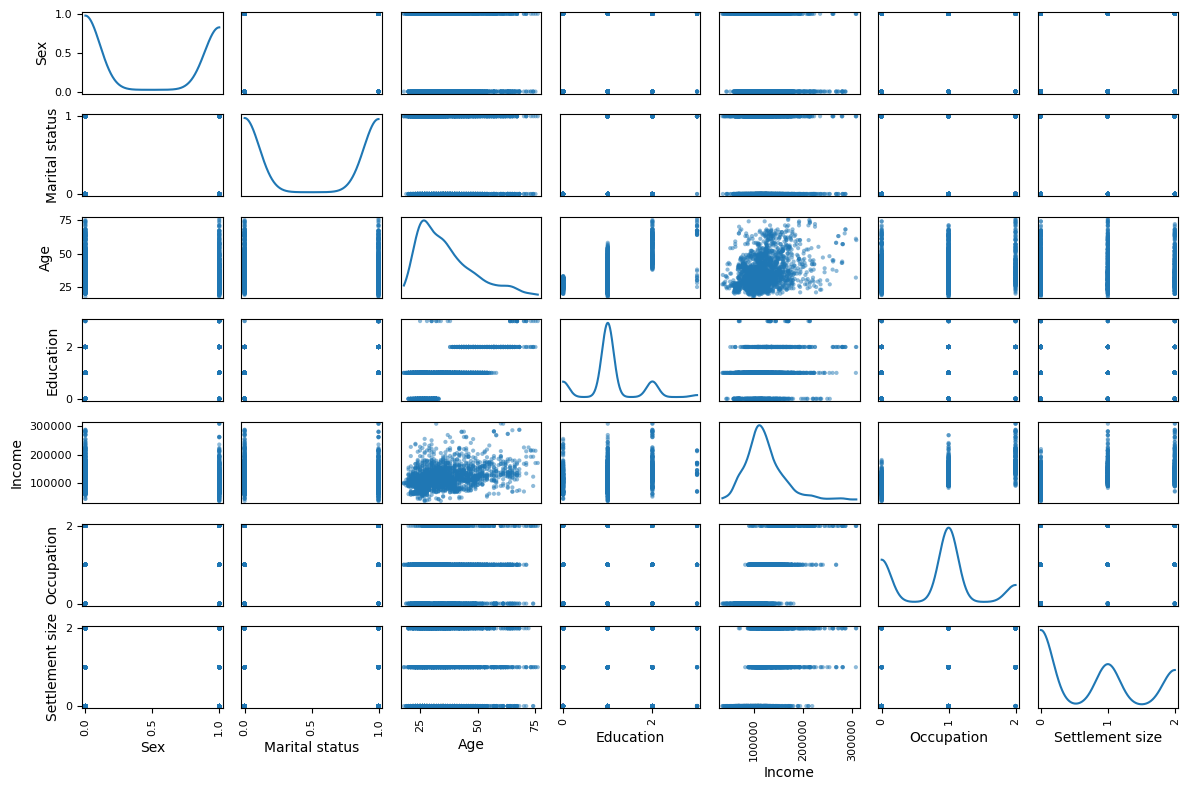

In [921]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_copy, figsize=(12, 8), diagonal='kde')

plt.tight_layout()
plt.show()

Look at the distribution

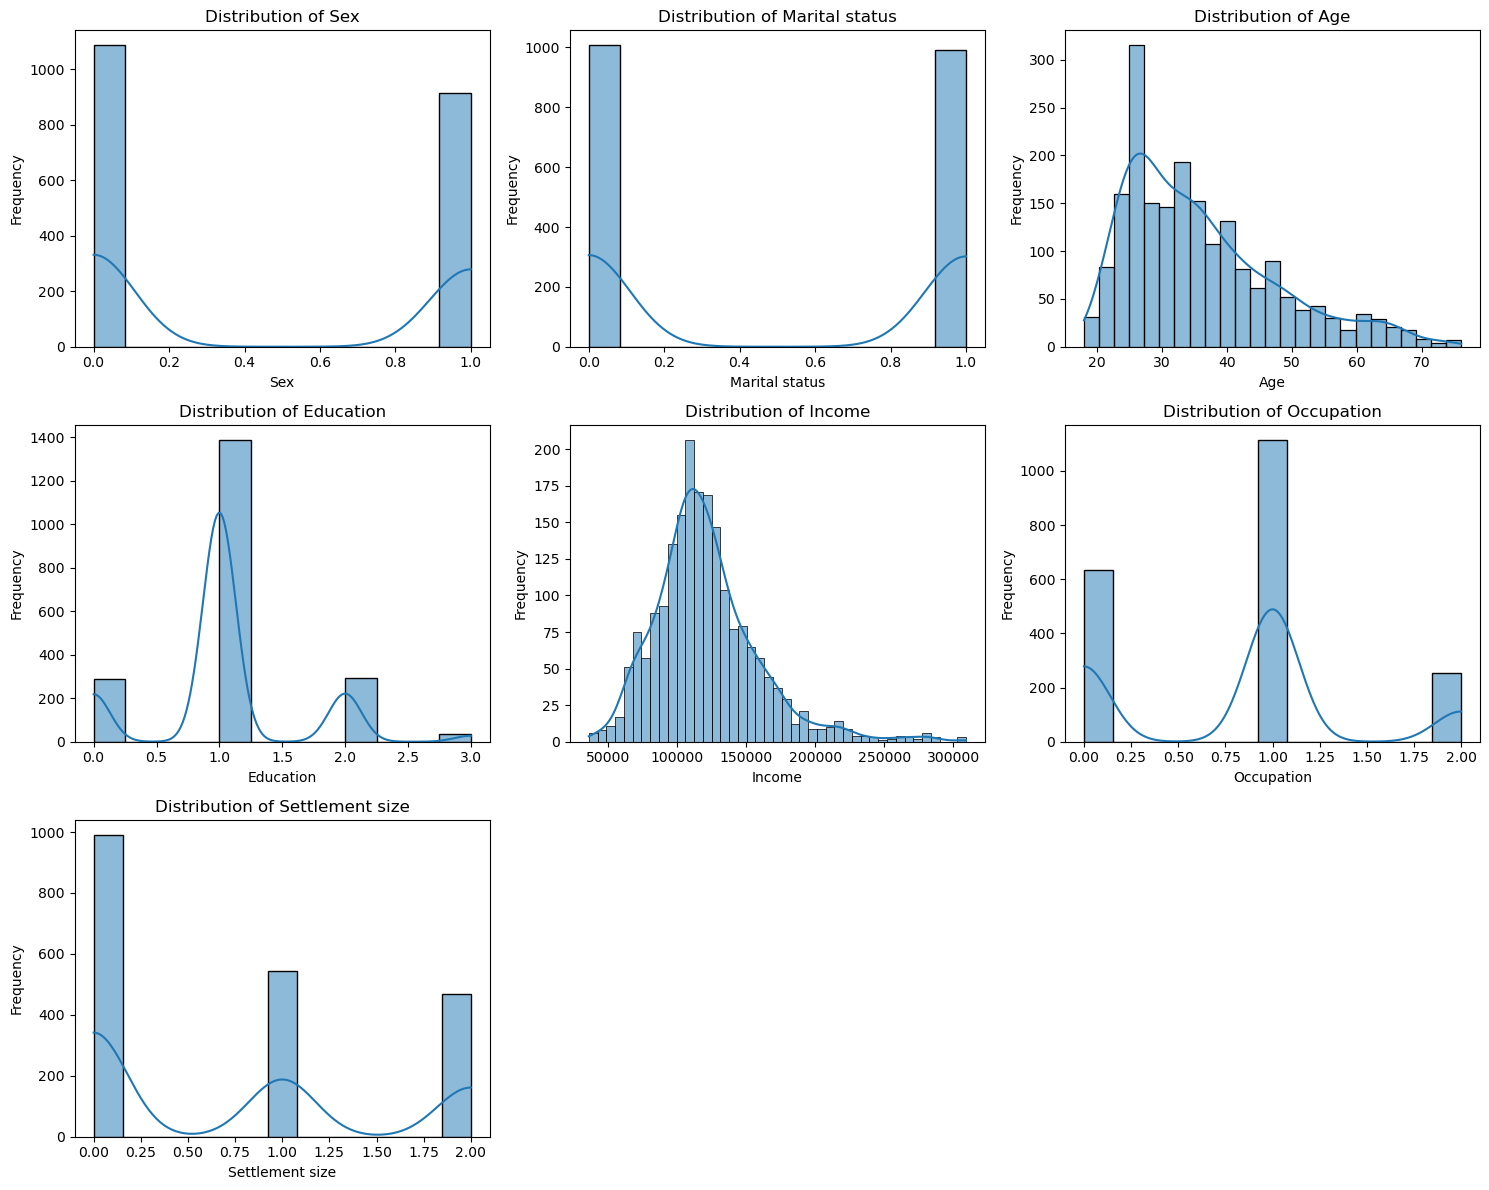

In [922]:
import seaborn as sns

n_cols = 3 
n_rows = (len(df_copy.columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(df_copy.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Check for outliers

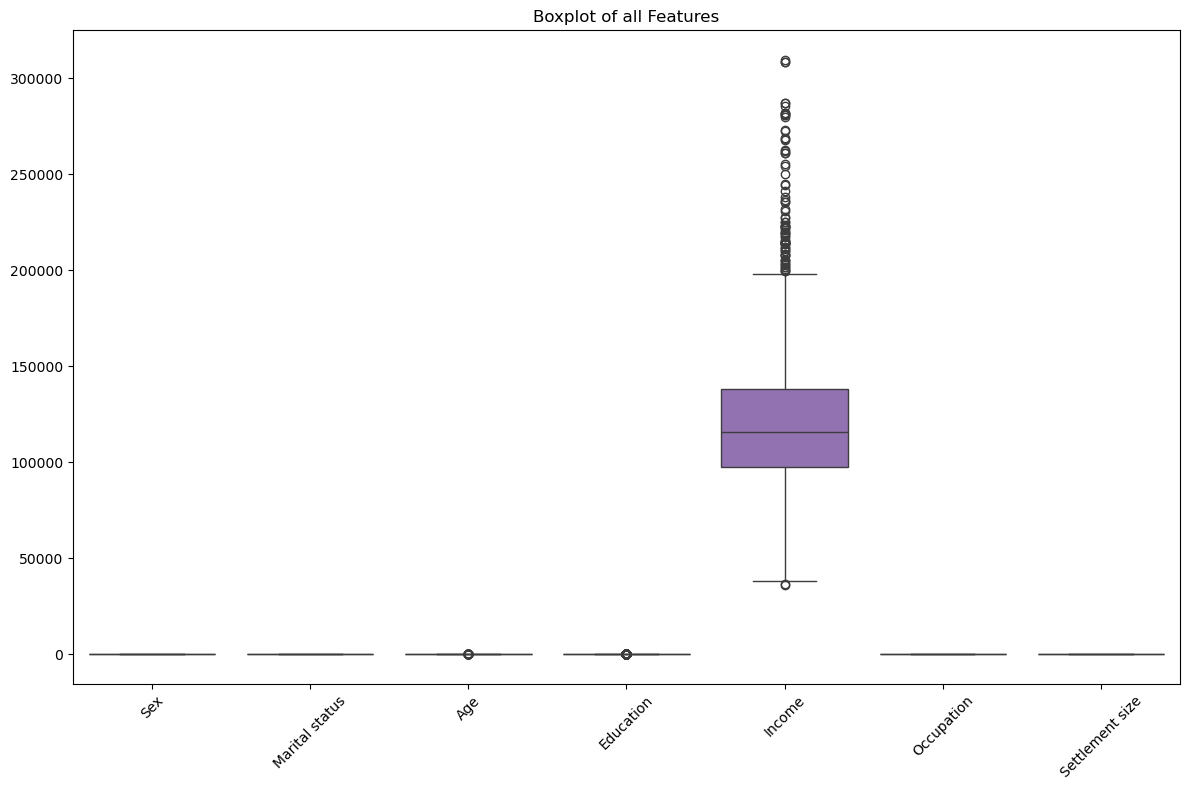

In [923]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_copy)
plt.title("Boxplot of all Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Further Preprocessing

* Dealing with `outliers` found during EDA.
* Feature engineering
* Scaling/normalizing and creating pipeline.

Let us see the numbers and actual Outliers for `Age and Income`

In [924]:

def check_for_outliers(d_frame, columns):
    for col in columns:
        Q1 = d_frame[col].quantile(0.25)
        Q3 = d_frame[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = d_frame[(d_frame[col] < lower_bound) | (d_frame[col] > upper_bound)]
        
        num_outliers = outliers.shape[0]
        
        print(f"Number of outliers in {col}: {num_outliers}")

        if num_outliers > 0:
            print(f"Outlier values for {col}:")
            print(outliers[col].values)
            print("-" * 50)

selected_columns = ['Age', 'Income']

check_for_outliers(df_copy, selected_columns)

Number of outliers in Age: 57
Outlier values for Age:
[67 66 66 70 65 74 68 66 75 74 65 75 67 74 65 66 74 66 67 65 68 65 68 66
 65 73 68 73 65 65 72 68 70 65 68 73 66 76 67 71 67 71 65 65 71 66 67 68
 71 67 67 71 66 70 65 67 67]
--------------------------------------------------
Number of outliers in Income: 83
Outlier values for Income:
[261952 202575 227385 241068 268340 244716 204723 214204 208101 224998
 211229 214364 217651 222294 236264 207783 215150 244541 210017 214620
 202997 219319 213333 209856 272314 309364 281923 260977 201699 220923
 230883 220050 219451 222360 205383 221842 217450 254449 208446 227021
  35832 201656 223630 223018 255198 235417 250050 235660 215639 212020
 231992 279593 200298 199711 237799 200621 308491 287247 268906 207262
 223185 203738 280570 214126 267872 218664 224961 262634 287106 281084
 273063 308529 199654 213768 214364 214732 205476 280566 211572 260847
 285647 281647  36760]
--------------------------------------------------


Remove Outliers

In [925]:
def remove_outliers(d_frame, columns):
    for col in columns:
        Q1 = d_frame[col].quantile(0.25)
        Q3 = d_frame[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        d_frame = d_frame[~((d_frame[col] < lower_bound) | (d_frame[col] > upper_bound))]

    return d_frame
    
df_copy = remove_outliers(df_copy, selected_columns)

print(f"DataFrame shape after removing outliers: {df_copy.shape}")

DataFrame shape after removing outliers: (1868, 7)


A look at `Age and Income` features distribution after outliers removal

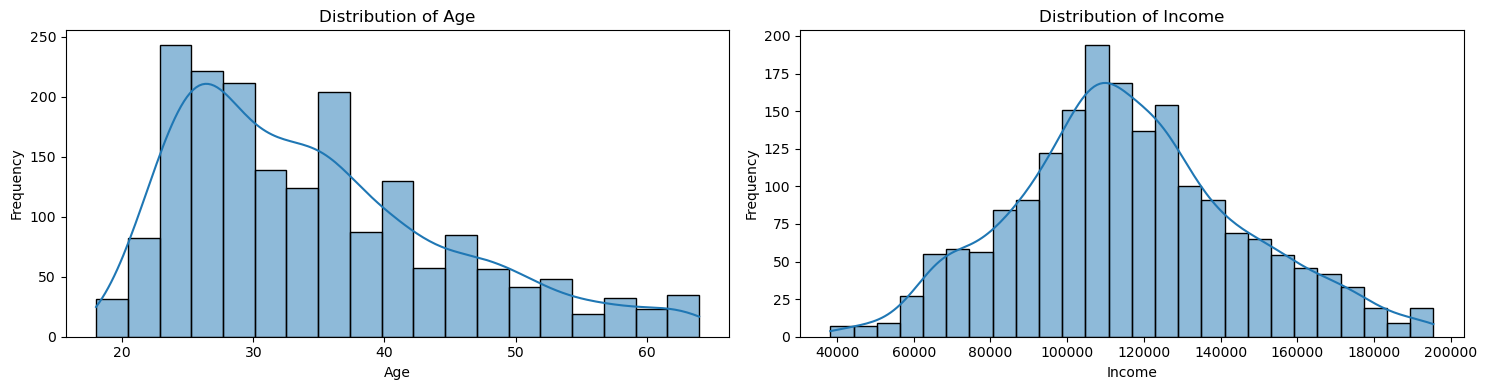

In [926]:
import seaborn as sns

outlier_columns = selected_columns
n_cols = 2
n_rows = (len(outlier_columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(outlier_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


For the purpose of visualization, we will select two most relevant features

In [927]:
relevant_features = [col for col in df_copy.columns if col in ['Age', 'Income']]
relevant_features = df_copy[relevant_features].iloc[:300]
relevant_features.head(3)
relevant_features.shape

(100, 2)

Transformation and Pipeline

In [928]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

attribs = relevant_features.columns 

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, attribs),
    ])

In [929]:
import pandas as pd
df_scaled = preprocess_pipeline.fit_transform(relevant_features)
df_scaled

array([[-1.27470134,  0.75226735],
       [ 1.04137781, -1.27221408],
       [ 0.69825497,  1.43600624],
       [ 1.38450065,  0.69498218],
       [-0.15955212,  0.55742544],
       [ 1.38450065,  0.94043366],
       [-0.15955212,  2.16131141],
       [ 2.07074632,  0.77916704],
       [-0.76001708,  1.53732403],
       [-1.01735921, -0.63888744],
       [-1.10313992, -0.00990159],
       [-1.27470134, -0.63171857],
       [ 1.98496561, -1.26682098],
       [-0.76001708, -0.82205528],
       [-0.41689425, -1.29792992],
       [ 1.38450065, -0.0771837 ],
       [-1.01735921,  0.9713124 ],
       [-0.50267496,  0.55114446],
       [ 0.9555971 , -0.29991185],
       [ 0.61247426,  0.64499742],
       [ 0.9555971 , -1.25268056],
       [ 0.61247426,  0.23088026],
       [-0.9315785 , -0.79679982],
       [-0.07377141, -1.84115245],
       [ 0.18357072, -1.96101722],
       [ 0.44091285,  1.15517082],
       [-0.24533283, -0.28248295],
       [ 2.24230774,  1.57796954],
       [-0.07377141,

In [930]:
df_scaled_dataframe = pd.DataFrame(df_scaled, columns=relevant_features.columns)
df_scaled_dataframe.head()

,Age,Income
0,-1.274701,0.752267
1,1.041378,-1.272214
2,0.698255,1.436006
3,1.384501,0.694982
4,-0.159552,0.557425


## Choose the Number of Clusters (k) and Apply K-Means Clustering

* Decide on the optimal number of clusters, k.
* Use methods like the Elbow Method or Silhouette Score to determine the optimal number of clusters.
* Train the K-Means model with the chosen number of clusters.
* Fit the K-Means algorithm to the preprocessed data and assign clusters.

c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_

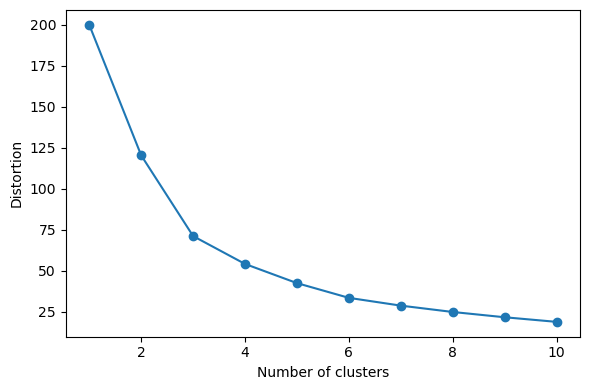

In [931]:
distortions = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    
    km.fit(df_scaled)

    distortions.append(km.inertia_)

plt.figure(figsize=(6, 4))

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

We will use the silhouette score to better define the number of clusters

In [932]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming your data is in 'X'
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")


For n_clusters = 2, the average silhouette score is: 0.3602989296427734
For n_clusters = 3, the average silhouette score is: 0.40694755241396335
For n_clusters = 4, the average silhouette score is: 0.3979860829051832
For n_clusters = 5, the average silhouette score is: 0.369558798825388
For n_clusters = 6, the average silhouette score is: 0.3790515196905907
For n_clusters = 7, the average silhouette score is: 0.3658167822034523
For n_clusters = 8, the average silhouette score is: 0.3409232312665312
For n_clusters = 9, the average silhouette score is: 0.371984349128985
For n_clusters = 10, the average silhouette score is: 0.3543741800847996


c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_

## Visualize the Clusters

* Use visualizations to interpret the clusters.
* If the data has two or three main features, use scatter plots.
* For high-dimensional data, you may use dimensionality reduction techniques like PCA or t-SNE before visualizing.

c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


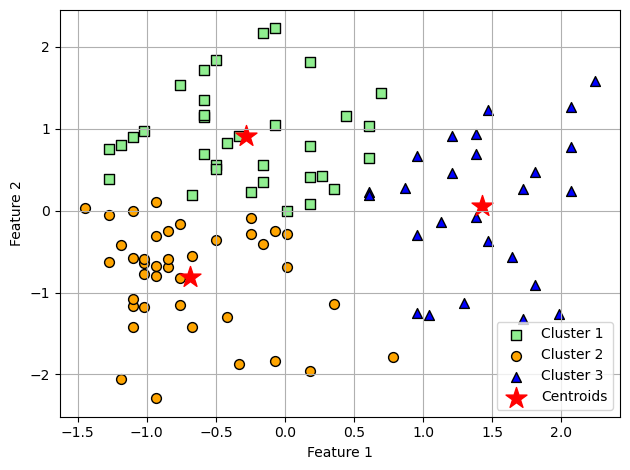

In [933]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters
km = KMeans(n_clusters=3,  # Set to 3 clusters
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

# Fit the model to the data and predict the cluster labels
y_km = km.fit_predict(df_scaled)

# Plot the data points belonging to the first cluster
plt.scatter(df_scaled[y_km == 0, 0],  # Data points in cluster 1
            df_scaled[y_km == 0, 1],
            s=50,  # Size of points
            c='lightgreen',  # Color for cluster 1
            edgecolor='black',
            marker='s',  # Square marker for cluster 1
            label='Cluster 1')

# Plot the data points belonging to the second cluster
plt.scatter(df_scaled[y_km == 1, 0],  # Data points in cluster 2
            df_scaled[y_km == 1, 1],
            s=50,
            c='orange',  # Color for cluster 2
            edgecolor='black',
            marker='o',  # Circle marker for cluster 2
            label='Cluster 2')

# Plot the data points belonging to the third cluster
plt.scatter(df_scaled[y_km == 2, 0],  # Data points in cluster 3
            df_scaled[y_km == 2, 1],
            s=50,
            c='blue',  # Color for cluster 3
            edgecolor='black',
            marker='^',  # Triangle marker for cluster 3
            label='Cluster 3')

# Plot the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250,  # Size of centroid marker
            marker='*',  # Star marker for centroids
            c='red',  # Color for centroids
            label='Centroids')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend for the plot
plt.legend()

# Add grid and make the layout tight
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()


## Evaluate the Clustering

* Assess how well the clustering performed.
* Use metrics such as the Silhouette Score to evaluate the quality of clusters.

c:\Users\click\anaconda3\envs\alex_projects\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


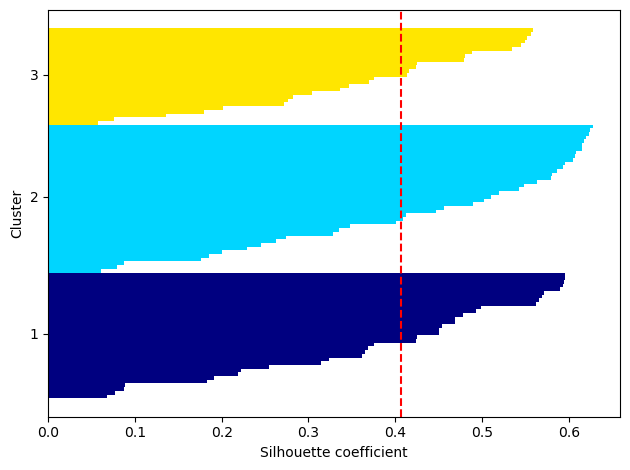

In [934]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

# Apply KMeans clustering
km = KMeans(n_clusters=3,  # We are working with 3 clusters
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

# Fit and predict cluster labels
y_km = km.fit_predict(df_scaled)

# Get unique cluster labels and number of clusters.
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# Calculate silhouette values for each sample
silhouette_vals = silhouette_samples(df_scaled, y_km, metric='euclidean')

# Initialize variables for plotting silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Loop through each cluster to plot the silhouette values
for i, c in enumerate(cluster_labels):
    # Get silhouette values for current cluster
    c_silhouette_vals = silhouette_vals[y_km == c]
    
    # Sort silhouette values for clear visual distinction
    c_silhouette_vals.sort()
    
    # Update the upper limit for the y-axis range
    y_ax_upper += len(c_silhouette_vals)
    
    # Get a color for each cluster (using colormap)
    color = cm.jet(float(i) / n_clusters)
    
    # Plot horizontal bars for silhouette values of the current cluster
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    
    # Calculate the tick for the middle of the current cluster
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    
    # Update the lower limit for the next cluster
    y_ax_lower += len(c_silhouette_vals)

# Calculate the average silhouette score across all samples
silhouette_avg = np.mean(silhouette_vals)

# Plot a vertical line for the average silhouette score
plt.axvline(silhouette_avg, color="red", linestyle="--") 

# Set the y-ticks (representing clusters)
plt.yticks(yticks, cluster_labels + 1)

# Label the axes
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

# Ensure the layout is tidy and readable
plt.tight_layout()

# Display the plot
plt.show()


### Locating regions of high density via DBSCAN

## Interpret the Results

* Draw conclusions from the clustering results.
* Examine the characteristics of each cluster. For example, if you clustered customers, analyze the typical characteristics of each customer group.

## Deploy the Model

* If applicable, integrate your clustering model into a business workflow (e.g., customer segmentation for marketing).